# Random Forest Model for predicting Sea Ice Drift

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Data Visualization and Data Exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path = '/gdrive/My Drive/AI_climate_sea-ice_challenge/'
data = pd.read_csv(path + 'DRIFT_DATA_TRAIN.csv')

In [4]:
print(data.shape)
data.head()

(339478, 15)


,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334


In [5]:
data.describe()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
count,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,72768.000000,339478.000000,339478.000000
mean,2007.013774,6.749374,15.744955,190.020314,163.595093,156.507375,-0.333029,1.359709,35576.107397,-0.096208,0.335691,0.955278,1.774036,2.069873,418.132032
std,9.822726,3.454148,8.752622,105.562830,24.451743,34.697790,8.072700,7.860918,31444.526635,4.319904,4.124477,0.124625,0.800483,0.922070,259.827915
min,1979.000000,1.000000,1.000000,1.000000,39.168983,36.870293,-74.682899,-66.781601,0.000000,-23.084634,-20.146717,0.000027,0.016601,0.000000,0.359009
25%,2000.000000,4.000000,8.000000,101.000000,146.809723,129.208836,-3.722860,-2.325024,7408.000000,-3.149262,-2.617482,0.976706,1.215125,1.478507,210.220330
50%,2009.000000,7.000000,16.000000,190.000000,161.223709,152.350731,-0.024725,0.322306,26150.000000,-0.165074,0.289388,1.000000,1.733047,2.041238,389.570385
75%,2015.000000,10.000000,23.000000,285.000000,181.115864,179.608978,2.942216,4.969131,64878.000000,2.934149,3.204041,1.000000,2.284967,2.619901,599.120875
max,2019.000000,12.000000,31.000000,364.000000,279.391541,279.562073,68.396103,68.639801,99800.000000,17.911558,22.862028,1.000000,4.930797,6.284669,1120.364872


In [6]:
data['Ui'] = np.sqrt((data['u_buoy']*data['u_buoy'])+(data['v_buoy']*data['v_buoy']))
data['Uw'] = np.sqrt((data['x_EASE']*data['x_EASE'])+(data['y_EASE']*data['y_EASE']))
data['Ua'] = np.sqrt((data['u_ERA5']*data['u_ERA5'])+(data['v_ERA5']*data['v_ERA5']))
data = data.drop(columns=['year','month','day','doy','h_cs2smos','id_buoy','u_buoy','v_buoy'])
data.head()

,x_EASE,y_EASE,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,Ui,Uw,Ua
0,147.506958,138.582672,-6.704156,-0.321260,0.990195,3.189743,522.523298,1.370671,202.394317,6.711849
1,146.834778,120.509880,-6.818630,-0.674205,0.966372,2.484009,412.767669,0.741408,189.955477,6.851881
2,130.993561,129.623672,-8.825469,1.123955,0.996022,2.474106,362.547379,1.187695,184.286759,8.896751
3,147.524719,157.382492,-1.079951,-1.035410,0.982681,3.740522,381.025629,0.920127,215.714607,1.496117
4,147.470963,138.599823,-2.169171,2.537787,0.990302,3.188522,521.535334,1.300527,202.379830,3.338513


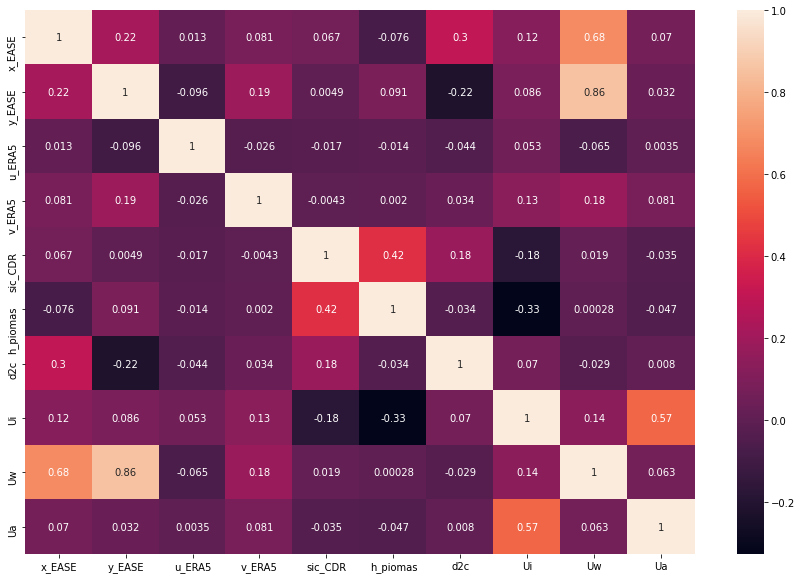

In [7]:
import seaborn as sns

corrs=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrs, annot=True)
plt.show()

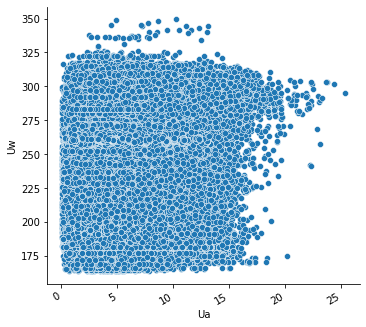

In [9]:
g = sns.relplot(x="Ua", y="Uw", kind="scatter", data=data)
g.fig.autofmt_xdate()

# Random Forest Model

In [10]:
x = data.drop(columns = ['Ui'])
y = data['Ui']

In [11]:
x = np.array(x)
y = np.array(y)
y = np.reshape(y,(-1,1))

In [15]:
data.describe()

,x_EASE,y_EASE,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,Ui,Uw,Ua
count,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000
mean,163.595093,156.507375,-0.096208,0.335691,0.955278,2.069873,418.132032,8.353460,227.967128,5.356477
std,24.451743,34.697790,4.319904,4.124477,0.124625,0.922070,259.827915,7.690366,33.026109,2.665124
min,39.168983,36.870293,-23.084634,-20.146717,0.000027,0.000000,0.359009,0.000000,163.535052,0.010611
25%,146.809723,129.208836,-3.149262,-2.617482,0.976706,1.478507,210.220330,2.888761,200.957311,3.411475
50%,161.223709,152.350731,-0.165074,0.289388,1.000000,2.041238,389.570385,6.664808,223.066630,5.076378
75%,181.115864,179.608978,2.934149,3.204041,1.000000,2.619901,599.120875,11.674104,252.798940,6.950391
max,279.391541,279.562073,17.911558,22.862028,1.000000,6.284669,1120.364872,75.609704,349.515860,25.356925


In [16]:
labels = y
features = x

In [ ]:
# Saving feature names for later use
features_list = list(data.columns)

In [18]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [19]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (254608, 9)
Training Labels Shape: (254608, 1)
Testing Features Shape: (84870, 9)
Testing Labels Shape: (84870, 1)


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(train_features,train_labels);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


# Predictions

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [ ]:
test_labels

array([-1.24256649e+01,  0.00000000e+00,  1.97640002e+00, ...,
       -5.29800018e-04, -8.93257523e+00, -5.16962004e+00])

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [ ]:
errors

array([1.01886718, 0.30428653, 0.59835911, ..., 3.09882813, 0.08236287,
       3.80635334])

In [ ]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.47 degrees.


# Determine Performance Metrics

In [ ]:
len(errors)

18192

In [ ]:
len(test_labels)

18192

In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [ ]:
errors = np.array(errors, dtype=float)

In [ ]:
test_labels = np.array(test_labels, dtype=float)

In [ ]:
div_error = np.divide(errors, test_labels, out=np.zeros_like(errors), where=test_labels!=0)

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = abs(div_error)

In [ ]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.66 %.


#### Example of using SimpleImputer from scikitlearn to deal with NAs

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [ ]:
imp.fit(data_rf)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
print(imp.transform(data_rf))

[[1.97900000e+03 2.00000000e+00 1.80000000e+01 ... 1.77403613e+00
  3.18974266e+00 5.22523298e+02]
 [1.97900000e+03 2.00000000e+00 1.80000000e+01 ... 1.77403613e+00
  2.48400856e+00 4.12767669e+02]
 [1.97900000e+03 2.00000000e+00 1.80000000e+01 ... 1.77403613e+00
  2.47410605e+00 3.62547379e+02]
 ...
 [2.01900000e+03 1.20000000e+01 3.00000000e+01 ... 2.05971642e+00
  1.96034855e+00 3.93799208e+02]
 [2.01900000e+03 1.20000000e+01 3.00000000e+01 ... 1.41127208e+00
  1.61089281e+00 6.80057567e+02]
 [2.01900000e+03 1.20000000e+01 3.00000000e+01 ... 1.22132631e+00
  1.33919699e+00 1.17227290e+01]]


In [ ]:
np.any(np.isnan(data_rf))

True

In [ ]:
np.all(np.isfinite(data_rf))

False

In [ ]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
clean_dataset(data_rf)

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
187015,2010.0,11.0,15.0,319.0,184.384552,103.994392,-19.964600,5.177920,181.0,-6.079730,4.529493,0.980000,0.478628,0.596565,129.568851
187016,2010.0,11.0,15.0,319.0,180.542542,123.743347,-10.682210,0.175190,30106.0,-5.519643,0.774484,1.000000,0.798815,0.908587,618.689390
187017,2010.0,11.0,15.0,319.0,135.393387,160.764053,0.067817,1.286222,3690.0,0.154826,5.193820,1.000000,2.353855,2.179764,67.341781
187018,2010.0,11.0,15.0,319.0,174.091263,200.540527,-1.457000,2.236015,42597.0,-3.377497,-0.159676,1.000000,2.347370,2.043858,204.495300
187019,2010.0,11.0,15.0,319.0,126.375542,119.100288,-18.638500,-1.504861,5302.0,-5.612238,2.991981,0.944378,0.344175,0.439518,180.807581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339473,2019.0,12.0,30.0,364.0,193.232056,172.742004,-0.981225,-11.698400,44880.0,-2.526544,-6.012877,1.000000,1.414148,1.620020,702.312813
339474,2019.0,12.0,30.0,364.0,208.421234,142.049896,-7.247925,-5.289890,53005.0,-4.615093,-0.381765,1.000000,1.039972,1.288953,360.491321
339475,2019.0,12.0,30.0,364.0,145.264023,146.109741,-0.913761,2.182150,95020.0,1.940967,1.119087,1.000000,2.059716,1.960349,393.799208
339476,2019.0,12.0,30.0,364.0,193.921402,174.408707,-0.101372,-11.791700,7750.0,-2.468425,-5.363596,1.000000,1.411272,1.610893,680.057567


In [ ]:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [ ]:
# Scikitlearn MultiOutputRegression model
# https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html#sklearn.multioutput.MultiOutputRegressor


In [ ]:
# Random Forest
# https://github.com/kjw0612/awesome-random-forest